In [5]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))

NameError: name 'num_filters' is not defined

In [6]:
model = Sequential()
model.add(Conv1D(num_filters,kernel_size,padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())

NameError: name 'num_filters' is not defined

In [1]:
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
(X_train,y_train),(X_test,y_test) = datasets.imdb.load_data(num_words=vocab_size)

In [3]:
print(X_train[:5])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [4]:
max_len = 200
X_train = pad_sequences(X_train,maxlen=max_len)
X_test = pad_sequences(X_test,maxlen=max_len)

In [5]:
print('X_train의 크기(shape) :',X_train.shape)
print('X_test의 크기(shape) :',X_test.shape)

X_train의 크기(shape) : (25000, 200)
X_test의 크기(shape) : (25000, 200)


In [6]:
print(y_train[:5])

[1 0 0 1 0]


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dropout, Conv1D,GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
embedding_dim = 256
dropout_ratio = 0.3
num_filters = 256
kernel_size = 3
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size,embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid',activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units,activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1,activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=3)
mc = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         2560000   
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 256)         196864    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test), callbacks=[es,mc])

Epoch 1/20
782/782 [==============================] - 12s 11ms/step - loss: 0.3978 - acc: 0.8072 - val_loss: 0.2926 - val_acc: 0.8718

Epoch 00001: val_acc improved from -inf to 0.87184, saving model to best_model.h5
Epoch 2/20
782/782 [==============================] - 9s 12ms/step - loss: 0.2019 - acc: 0.9231 - val_loss: 0.2659 - val_acc: 0.8904

Epoch 00002: val_acc improved from 0.87184 to 0.89040, saving model to best_model.h5
Epoch 3/20
782/782 [==============================] - 9s 11ms/step - loss: 0.0942 - acc: 0.9681 - val_loss: 0.3066 - val_acc: 0.8886

Epoch 00003: val_acc did not improve from 0.89040
Epoch 4/20
782/782 [==============================] - 8s 11ms/step - loss: 0.0416 - acc: 0.9858 - val_loss: 0.3762 - val_acc: 0.8822

Epoch 00004: val_acc did not improve from 0.89040
Epoch 5/20
782/782 [==============================] - 8s 10ms/step - loss: 0.0273 - acc: 0.9907 - val_loss: 0.4800 - val_acc: 0.8851

Epoch 00005: val_acc did not improve from 0.89040
Epoch 00005:

In [9]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도 : %.4f" % (loaded_model.evaluate(X_test,y_test)[1]))

782/782 [==============================] - 3s 4ms/step - loss: 0.2659 - acc: 0.8904

 테스트 정확도 : 0.8904


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')

In [12]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
data.drop_duplicates(subset=['v2'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5169


In [17]:
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407]]


In [21]:
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (4135, 189)


In [22]:
from tensorflow.keras.layers import Dense,Conv1D,GlobalMaxPooling1D,Embedding,Dropout,MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

embedding_dim = 32
dropout_ratio = 0.3
num_filters = 32
kernel_size = 5

model = Sequential()
model.add(Embedding(vocab_size,embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid',activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_ratio))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
mc = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max', verbose=1,save_best_only=True)

history = model.fit(X_train_padded,y_train,epochs=10,batch_size=64,validation_split=0.2,callbacks=[es,mc])

Epoch 1/10
52/52 [==============================] - 2s 13ms/step - loss: 0.4412 - acc: 0.8697 - val_loss: 0.3614 - val_acc: 0.8779

Epoch 00001: val_acc improved from -inf to 0.87787, saving model to best_model.h5
Epoch 2/10
52/52 [==============================] - 0s 6ms/step - loss: 0.3589 - acc: 0.8727 - val_loss: 0.3334 - val_acc: 0.8779

Epoch 00002: val_acc did not improve from 0.87787
Epoch 3/10
52/52 [==============================] - 0s 6ms/step - loss: 0.2692 - acc: 0.8881 - val_loss: 0.2219 - val_acc: 0.9698

Epoch 00003: val_acc improved from 0.87787 to 0.96977, saving model to best_model.h5
Epoch 4/10
52/52 [==============================] - 0s 7ms/step - loss: 0.1373 - acc: 0.9613 - val_loss: 0.1182 - val_acc: 0.9758

Epoch 00004: val_acc improved from 0.96977 to 0.97582, saving model to best_model.h5
Epoch 5/10
52/52 [==============================] - 0s 7ms/step - loss: 0.0783 - acc: 0.9758 - val_loss: 0.0956 - val_acc: 0.9770

Epoch 00005: val_acc improved from 0.97582

In [25]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 0s 3ms/step - loss: 0.0685 - acc: 0.9816

 테스트 정확도: 0.9816


In [1]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Embedding,Dropout,Conv1D,GlobalMaxPooling1D,Dense,Input,Flatten,Concatenate
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import load_model

embedding_dim = 128
dropout_ratio = (0.5,0.8)
num_filters = 128
hidden_units = 128

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x1f606af2280>)

In [5]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [6]:
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [7]:
train_data.drop_duplicates(subset=['document'], inplace=True)

In [8]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [9]:
train_data = train_data.dropna(how = 'any')

In [10]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

<ipython-input-10-9c6253be230d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [11]:
train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    789
label         0
dtype: int64


<ipython-input-11-c2f9538d5bc3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경


In [12]:
train_data = train_data.dropna(how = 'any')

In [13]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48852


<ipython-input-13-c182d8fa0991>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
<ipython-input-13-c182d8fa0991>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경


In [14]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [16]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [17]:
X_train = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████| 145393/145393 [05:43<00:00, 423.46it/s]


In [18]:
X_test = []
for sentence in tqdm(test_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|███████████████████████████████████████████████████████████████████████████| 48852/48852 [02:12<00:00, 370.05it/s]


In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [20]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 43752
등장 빈도가 2번 이하인 희귀 단어의 수: 24337
단어 집합에서 희귀 단어의 비율: 55.62488571950996
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.8715872104872904


In [21]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 19416


In [22]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [23]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [24]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [25]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

145162
145162


C:\Users\sunho\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [26]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [27]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.31944999380003


In [28]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [29]:
model_input = Input(shape= (max_len,))
z = Embedding(vocab_size,embedding_dim,input_length = max_len,name='embedding')(model_input)
z = Dropout(dropout_ratio[0])(z)

In [30]:
conv_blocks = []

for sz in [3,4,5]:
    conv = Conv1D(filters = num_filters,kernel_size=sz,padding='valid',activation='relu',strides=1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

In [31]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_ratio[1])(z)
z = Dense(hidden_units,activation='relu')(z)
model_output = Dense(1,activation='sigmoid')(z)

model = Model(model_input,model_output)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=4)
mc = ModelCheckpoint('CNN_model.h5', monitor='val_acc',mode='max',verbose=1,save_best_only=True)

model.fit(X_train,y_train,batch_size=64,epochs=10,validation_split=0.2,verbose=2,callbacks=[es,mc])

Epoch 1/10
1815/1815 - 19s - loss: 0.4387 - acc: 0.7886 - val_loss: 0.3655 - val_acc: 0.8427

Epoch 00001: val_acc improved from -inf to 0.84273, saving model to CNN_model.h5
Epoch 2/10
1815/1815 - 15s - loss: 0.3474 - acc: 0.8513 - val_loss: 0.3562 - val_acc: 0.8470

Epoch 00002: val_acc improved from 0.84273 to 0.84700, saving model to CNN_model.h5
Epoch 3/10
1815/1815 - 15s - loss: 0.3132 - acc: 0.8681 - val_loss: 0.3559 - val_acc: 0.8489

Epoch 00003: val_acc improved from 0.84700 to 0.84890, saving model to CNN_model.h5
Epoch 4/10
1815/1815 - 15s - loss: 0.2882 - acc: 0.8803 - val_loss: 0.3597 - val_acc: 0.8467

Epoch 00004: val_acc did not improve from 0.84890
Epoch 5/10
1815/1815 - 15s - loss: 0.2687 - acc: 0.8891 - val_loss: 0.3669 - val_acc: 0.8432

Epoch 00005: val_acc did not improve from 0.84890
Epoch 6/10
1815/1815 - 15s - loss: 0.2535 - acc: 0.8971 - val_loss: 0.3719 - val_acc: 0.8418

Epoch 00006: val_acc did not improve from 0.84890
Epoch 7/10
1815/1815 - 15s - loss: 0.

In [32]:
loaded_model = load_model('CNN_model.h5')
print('\n 테스트 정확도: %.4f' %(loaded_model.evaluate(X_test,y_test)[1]))

1527/1527 [==============================] - 6s 4ms/step - loss: 0.3624 - acc: 0.8409

 테스트 정확도: 0.8409


In [34]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [35]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

89.98% 확률로 긍정 리뷰입니다.



In [36]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')

98.93% 확률로 부정 리뷰입니다.



In [37]:
sentiment_predict('이딴게 영화냐 ㅉㅉ')

98.10% 확률로 부정 리뷰입니다.



In [38]:
sentiment_predict('감독 뭐하는 놈이냐?')

92.67% 확률로 부정 리뷰입니다.



In [39]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')

79.99% 확률로 긍정 리뷰입니다.



In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [42]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_train_data.csv", filename="intent_train_data.csv")
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_test_data.csv", filename="intent_test_data.csv")

train_data = pd.read_csv('intent_train_data.csv')
test_data = pd.read_csv('intent_test_data.csv')

In [62]:
train_data

,intent,label
0,add another song to the cita rom ntica playlist,AddToPlaylist
1,add clem burke in my playlist pre party r b jams,AddToPlaylist
2,add live from aragon ballroom to trapeo,AddToPlaylist
3,add unite and win to my night out,AddToPlaylist
4,add track to my digster future hits,AddToPlaylist
...,...,...
11779,can a i get the movie schedule for sympathy fo...,SearchScreeningEvent
11780,find movie schedules for animated movies aroun...,SearchScreeningEvent
11781,what time is bordertown trail showing,SearchScreeningEvent
11782,in the neighbourhood find movies with movie times,SearchScreeningEvent


In [63]:
test_data

,intent,label
0,i 'd like to have this track onto my classical...,AddToPlaylist
1,add the album to my flow espa ol playlist,AddToPlaylist
2,add digging now to my young at heart playlist,AddToPlaylist
3,add this song by too poetic to my piano ballad...,AddToPlaylist
4,add this album to old school death metal,AddToPlaylist
...,...,...
595,is any cinema playing the spirit of youth,SearchScreeningEvent
596,what are the movie times for animated movies i...,SearchScreeningEvent
597,what 's the movie schedule at great escape the...,SearchScreeningEvent
598,show the times for cheers for miss bishop at d...,SearchScreeningEvent


In [64]:
intent_train = train_data['intent'].tolist()
label_train = train_data['label'].tolist()
intent_test = test_data['intent'].tolist()
label_test = test_data['label'].tolist()

print('훈련용 문장의 수 :', len(intent_train))
print('훈련용 레이블의 수 :', len(label_train))
print('테스트용 문장의 수 :', len(intent_test))
print('테스트용 레이블의 수 :', len(label_test))

훈련용 문장의 수 : 11784
훈련용 레이블의 수 : 11784
테스트용 문장의 수 : 600
테스트용 레이블의 수 : 600


In [65]:
print(intent_train[:5])
print(label_train[:5])

['add another song to the cita rom ntica playlist', 'add clem burke in my playlist pre party r b jams', 'add live from aragon ballroom to trapeo', 'add unite and win to my night out', 'add track to my digster future hits']
['AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist']


In [66]:
print(intent_train[2000:2002])
print(label_train[2000:2002])

['please book reservations for 3 people at a restaurant in alderwood manor', 'book a table in mt for 3 for now at a pub that serves south indian']
['BookRestaurant', 'BookRestaurant']


In [67]:
print(intent_train[4000:4002])
print(label_train[4000:4002])

['what will the weather be like on feb 8 , 2034 in cedar mountain wilderness', "tell me the forecast in the same area here on robert e lee 's birthday"]
['GetWeather', 'GetWeather']


In [68]:
print(intent_train[6000:6002])
print(label_train[6000:6002])

['rate the current album one points', 'i give a zero rating for this essay']
['RateBook', 'RateBook']


In [69]:
print(intent_train[8000:8002])
print(label_train[8000:8002])

["i'm trying to find the show chant ii", 'find spirit of the bush']
['SearchCreativeWork', 'SearchCreativeWork']


In [70]:
print(intent_train[10000:10002])
print(label_train[10000:10002])

['when is blood and ice cream trilogie playing at the nearest movie theatre \\?', 'show movie schedules']
['SearchScreeningEvent', 'SearchScreeningEvent']


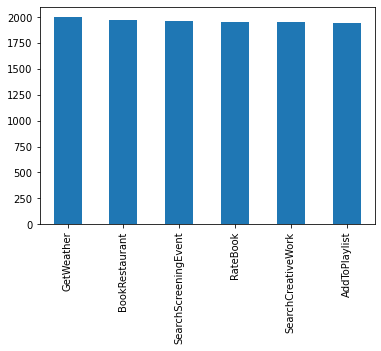

In [71]:
train_data['label'].value_counts().plot(kind='bar')

In [72]:
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(label_train)

label_train = idx_encode.transform(label_train)
label_test = idx_encode.transform(label_test)

label_idx = dict(zip(list(idx_encode.classes_),idx_encode.transform(list(idx_encode.classes_))))
print('레이블과 정수의 맵핑 관계:',label_idx)

레이블과 정수의 맵핑 관계: {'AddToPlaylist': 0, 'BookRestaurant': 1, 'GetWeather': 2, 'RateBook': 3, 'SearchCreativeWork': 4, 'SearchScreeningEvent': 5}


In [73]:
print(intent_train[:5])
print(label_train[:5])

['add another song to the cita rom ntica playlist', 'add clem burke in my playlist pre party r b jams', 'add live from aragon ballroom to trapeo', 'add unite and win to my night out', 'add track to my digster future hits']
[0 0 0 0 0]


In [74]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(intent_train)
sequences = tokenizer.texts_to_sequences(intent_train)
sequences[:5]

[[11, 191, 61, 4, 1, 4013, 1141, 1572, 15],
 [11, 2624, 1573, 3, 14, 15, 939, 82, 256, 188, 548],
 [11, 187, 42, 2625, 4014, 4, 1968],
 [11, 2626, 22, 2627, 4, 14, 192, 27],
 [11, 92, 4, 14, 651, 520, 195]]

In [75]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print('단어 집합(vocabulary)의 크기 :',vocab_size)

단어 집합(vocabulary)의 크기 : 9870


문장의 최대 길이 : 35
문장의 평균 길이 : 9.364392396469789


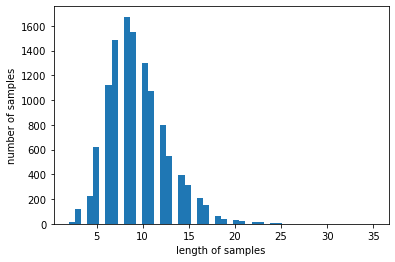

In [76]:
print('문장의 최대 길이 :',max(len(l) for l in sequences))
print('문장의 평균 길이 :',sum(map(len,sequences))/len(sequences))
plt.hist([len(s) for s in sequences],bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [77]:
max_len = 35
intent_train = pad_sequences(sequences,maxlen=max_len)
label_train = to_categorical(np.asarray(label_train))
print('훈련 데이터의 크기(shape):',intent_train.shape)
print('훈련 데이터 레이블의 크기(shape):',label_train.shape)

훈련 데이터의 크기(shape): (11784, 35)
훈련 데이터 레이블의 크기(shape): (11784, 6)


In [78]:
print('훈련 데이터의 첫번째 샘플:',intent_train[0])
print('훈련 데이터의 첫번째 샘플의 레이블 :',label_train[0])

훈련 데이터의 첫번째 샘플: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   11  191
   61    4    1 4013 1141 1572   15]
훈련 데이터의 첫번째 샘플의 레이블 : [1. 0. 0. 0. 0. 0.]


In [79]:
indices = np.arange(intent_train.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)

랜덤 시퀀스 : [7886 3855 3495 ... 1384 3923 1591]


In [80]:
intent_train = intent_train[indices]
label_train = label_train[indices]

In [82]:
n_of_val = int(0.1 * intent_train.shape[0])
print('검증 데이터의 개수 :',n_of_val)

검증 데이터의 개수 : 1178


In [84]:
X_train = intent_train[:n_of_val]
y_train = label_train[:-n_of_val]
X_val = intent_train[-n_of_val:]
y_val = label_train[-n_of_val:]
X_test = intent_test
y_test = label_test

In [86]:
print('훈련 데이터의 크기(shape):',X_train.shape)
print('검증 데이터의 크기(shape):',X_val.shape)
print('훈련 데이터 레이블의 크기(shape):',y_train.shape)
print('검증 데이터 레이블의 크기(shape):',y_val.shape)
print('테스트 데이터의 개수 :',len(X_test))
print('테스트 데이터 레이블의 개수 :',len(y_test))

훈련 데이터의 크기(shape): (1178, 35)
검증 데이터의 크기(shape): (1178, 35)
훈련 데이터 레이블의 크기(shape): (10606, 6)
검증 데이터 레이블의 크기(shape): (1178, 6)
테스트 데이터의 개수 : 600
테스트 데이터 레이블의 개수 : 600


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [3]:
embedding_dict = dict()
f = open(os.path.join('glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array로 변환
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [4]:
print(embedding_dict['respectable'])
print(len(embedding_dict['respectable']))

[-0.049773   0.19903    0.10585    0.1391    -0.32395    0.44053
  0.3947    -0.22805   -0.25793    0.49768    0.15384   -0.08831
  0.0782    -0.8299    -0.037788   0.16772   -0.45197   -0.17085
  0.74756    0.98256    0.81872    0.28507    0.16178   -0.48626
 -0.006265  -0.92469   -0.30625   -0.067318  -0.046762  -0.76291
 -0.0025264 -0.018795   0.12882   -0.52457    0.3586     0.43119
 -0.89477   -0.057421  -0.53724    0.25587    0.55195    0.44698
 -0.24252    0.29946    0.25776   -0.8717     0.68426   -0.05688
 -0.1848    -0.59352   -0.11227   -0.57692   -0.013593   0.18488
 -0.32507   -0.90171    0.17672    0.075601   0.54896   -0.21488
 -0.54018   -0.45882   -0.79536    0.26331    0.18879   -0.16363
  0.3975     0.1099     0.1164    -0.083499   0.50159    0.35802
  0.25677    0.088546   0.42108    0.28674   -0.71285   -0.82915
  0.15297   -0.82712    0.022112   1.067     -0.31776    0.1211
 -0.069755  -0.61327    0.27308   -0.42638   -0.085084  -0.17694
 -0.0090944  0.1109     0.

In [7]:
vocab_size = 9870
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size,embedding_dim))
print('임베딩 테이블의 크기(shape) :',np.shape(embedding_matrix))

임베딩 테이블의 크기(shape) : (9870, 100)


이후부터는 오류 발생으로 진행불가

In [12]:
for word, index in tokenizer.word_index.items():
    vector_value = embedding_dict.get(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

NameError: name 'tokenizer' is not defined

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding,Dropout,Conv1D,GlobalMaxPooling1D,Dense,Input,Flatten,Concatenate

kernel_sizes = [2,3,5]
num_filters = 512
dropout_ratio = 0.5

model_input = Input(shape=(max_len,))
output = Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],
                  input_length=max_len,trainable=False)(model_input)

conv_blocks = []
for size in kernel_sizes:
    conv = Conv1D(filters=num_filters,kernel_size=size,padding='valid',activation='relu',strides=1)(output)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

output = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
output = Dropout(dropout_ratio)(output)
model_output = Dense(len(label_idx), activation='softmax')(output)
model = Model(model_input,model_output)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

NameError: name 'max_len' is not defined

In [15]:
history = model.fit(X_train,y_train,
                   batch_size=64,
                   epochs=10,
                   validation_data=(X_val,y_val))

NameError: name 'model' is not defined

In [16]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

NameError: name 'history' is not defined

In [17]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len)

NameError: name 'tokenizer' is not defined

In [18]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.argmax(axis=-1) # 예측을 정수 시퀀스로 변환

NameError: name 'model' is not defined

In [19]:
print('정확도(Accuracy) : ', sum(y_predicted == y_test) / len(y_test))

NameError: name 'y_predicted' is not defined